In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

#Extracting information about conferences on Artificaial Intelligence 
#that took place between 01-jan-2019 and 01-jan-2020
#link used for web scraping 
#http://www.allconferences.com/search/index/Category__parent_id:15474/Conference__start_date__from:01-01-2019/Conference__start_date__to:01-01-2020/showLastConference:1/page:1/
#pages-1,2,3

pages = []
conf_name = []
conf_date = []
for i in range(1, 4):
    url = 'http://www.allconferences.com/search/index/Category__parent_id:15474/Conference__start_date__from:01-01-2019/Conference__start_date__to:01-01-2020/showLastConference:1/page:' + str(i) + '/'
    pages.append(url)
    
for page in pages: 
    #collecting the first page of conferences and creating a beautiful soup object
    page = requests.get(page)
    soup = BeautifulSoup(page.text, 'html.parser')

    #Extracting the text form the webpage from the div element with class categories_conferences
    C_list = soup.find(id ='categories_conferences')

    #Removing the links and Superfluous Data from the text
    last_links_1 = soup.find(class_='order_option')
    last_links_1.decompose()
    last_links_2 = soup.find(class_='pager')
    last_links_2.decompose()
    last_links_3 = soup.find(id='categoryViewFormEmptList')
    last_links_3.decompose()

    #extracting text from all the instances of h2 tag within the div element
    list_items = C_list.find_all('h2')

    for x in list_items:
        names = x.a.text
        conf_name.append(names)
        print(names)

    list_items_date = C_list.find_all('span')
    
    for k in list_items_date:
        date = k.contents[1].strip()
        conf_date.append(date)
        print(date)

2019 6th International Conference on Artificial Intelligence (ICOAI 2019)--JA, Scopus
2019 Int. Conference on Artificial Intelligence, Robotics and Control (AIRC 2019)--EI,Scopus
2019 3rd Asia Conference on Machine Learning and Computing (ACMLC 2019)--JA, Scopus
2019 3rd Int. Conference on Computer Science and Artificial Intelligence (CSAI 2019)--Ei,Scopus
2019 International Workshop on Artificial Intelligence and Education (WAIE 2019)--Ei,Scopus
2019 The 2nd Int. Conf. on Computational Intelligence and Intelligent Systems(CIIS 2019)--Ei,Scopus
2019 5th International Conference on Robotics and Artificial Intelligence (ICRAI 2019)--Ei,Scopus
2019 6th Intl. Conference on Soft Computing  Machine Intelligence (ISCMI 2019)--Ei,Scopus
SPIE--2019 The 12th International Conference on Machine Vision (ICMV 2019)--EI,Scopus
2019 2nd International Conference on Big Data and Machine Learning (BDML 2019)--Ei,Scopus
2019 The 3rd International Conference on Advances in Artificial Intelligence (ICAAI 2

In [2]:
print(conf_name)

['2019 6th International Conference on Artificial Intelligence (ICOAI 2019)--JA, Scopus', '2019 Int. Conference on Artificial Intelligence, Robotics and Control (AIRC 2019)--EI,Scopus', '2019 3rd Asia Conference on Machine Learning and Computing (ACMLC 2019)--JA, Scopus', '2019 3rd Int. Conference on Computer Science and Artificial Intelligence (CSAI 2019)--Ei,Scopus', '2019 International Workshop on Artificial Intelligence and Education (WAIE 2019)--Ei,Scopus', '2019 The 2nd Int. Conf. on Computational Intelligence and Intelligent Systems(CIIS 2019)--Ei,Scopus', '2019 5th International Conference on Robotics and Artificial Intelligence (ICRAI 2019)--Ei,Scopus', '2019 6th Intl. Conference on Soft Computing  Machine Intelligence (ISCMI 2019)--Ei,Scopus', 'SPIE--2019 The 12th International Conference on Machine Vision (ICMV 2019)--EI,Scopus', '2019 2nd International Conference on Big Data and Machine Learning (BDML 2019)--Ei,Scopus', '2019 The 3rd International Conference on Advances in 

In [3]:
while("" in conf_date) : 
    conf_date.remove("")
print(conf_date)

['Dec 20, 2019', 'Dec 16, 2019', 'Dec 09, 2019', 'Dec 08, 2019', 'Nov 27, 2019', 'Nov 25, 2019', 'Nov 24, 2019', 'Nov 20, 2019', 'Nov 18, 2019', 'Nov 10, 2019', 'Oct 28, 2019', 'Oct 27, 2019', 'Oct 14, 2019', 'Sep 30, 2019', 'Sep 20, 2019', 'Sep 16, 2019', 'Aug 30, 2019', 'Aug 29, 2019', 'Aug 28, 2019', 'Aug 18, 2019', 'Jul 29, 2019', 'Jul 12, 2019', 'Jul 07, 2019', 'Jul 07, 2019', 'Jun 24, 2019', 'Jun 23, 2019', 'Jun 23, 2019', 'May 28, 2019', 'Apr 22, 2019', 'Apr 22, 2019', 'Apr 15, 2019', 'Apr 15, 2019', 'Mar 24, 2019', 'Mar 18, 2019', 'Mar 10, 2019', 'Feb 24, 2019 06:00 PM', 'Feb 24, 2019', 'Jan 18, 2019', 'Jan 14, 2019', 'Jul 14, 2019 06:00 PM', 'May 26, 2019 06:00 PM', 'Apr 28, 2019 06:00 PM', 'Jan 20, 2019 06:00 PM']


In [4]:
#Grouping the conferences by month

s = pd.to_datetime(pd.Series(conf_date), format='%b %d, %Y',errors="coerce")
s.index = s.dt.to_period('m')
s = s.groupby(level=0).size()

s = s.reindex(pd.period_range(s.index.min(), s.index.max(), freq='m'), fill_value=0)

#Printing the count of conferences that took place in each month
print (s)

2019-01    2
2019-02    1
2019-03    3
2019-04    4
2019-05    1
2019-06    3
2019-07    4
2019-08    4
2019-09    3
2019-10    3
2019-11    6
2019-12    4
Freq: M, dtype: int64


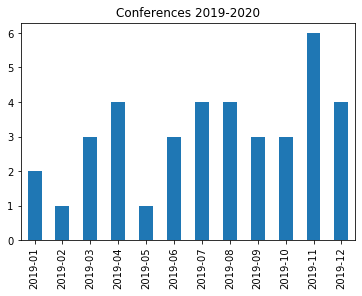

In [5]:
s.plot.bar(title='Conferences 2019-2020')

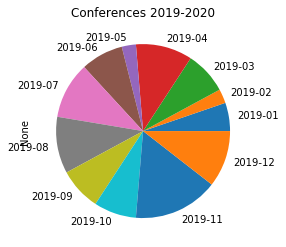

In [6]:
s.plot.pie(title='Conferences 2019-2020')

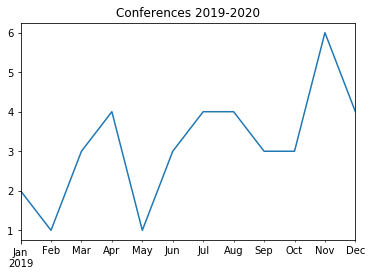

In [7]:
s.plot.line(title='Conferences 2019-2020')